# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Define Values and Dates
Define the portfolio values and corresponding dates.

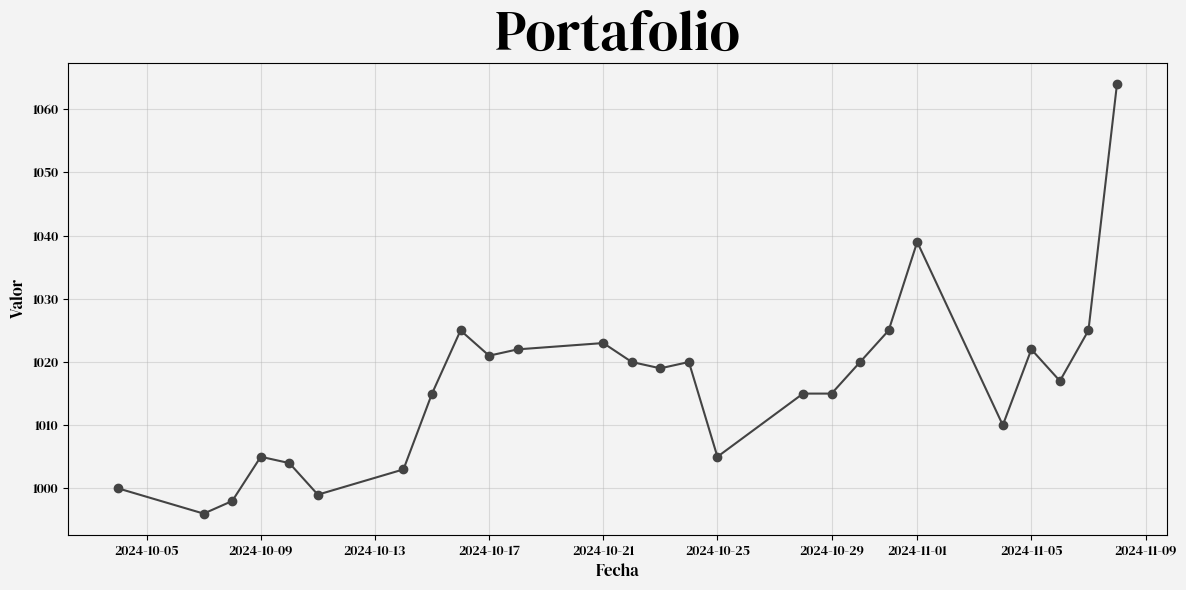

In [2]:
# Define the values and dates
values = [1000, 996, 998, 1005, 1004, 999, 1003, 1015, 1025, 1021, 1022, 1023, 1020, 1019, 1020, 1005, 1015, 1015, 1020, 1025, 1039, 1010, 1022, 1017, 1025, 1064]
dates = pd.date_range(start='2024-10-04', end='2024-11-08', freq='B')

# Check if DM Serif Display font is available, if not, download it
if 'DM Serif Display' not in [f.name for f in fm.fontManager.ttflist]:
    import urllib.request
    import os

    font_url = 'https://github.com/google/fonts/raw/main/ofl/dmserifdisplay/DMSerifDisplay-Regular.ttf'
    font_path = os.path.join(os.path.expanduser('~'), '.fonts', 'DMSerifDisplay-Regular.ttf')
    os.makedirs(os.path.dirname(font_path), exist_ok=True)
    urllib.request.urlretrieve(font_url, font_path)
    fm.fontManager.addfont(font_path)

# Set the font properties globally
plt.rcParams['font.family'] = 'DM Serif Display'


# Create a DataFrame
df = pd.DataFrame(data={'Value': values}, index=dates)

# Plot the values with custom color
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#f3f3f3')
ax.set_facecolor('#f3f3f3')
plt.plot(df.index, df['Value'], marker='o', color='#434343')
plt.title('Portafolio', fontsize=40, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(True, alpha=0.4)

# Export the plot as a PDF
plt.savefig('plot.pdf')
plt.show()

# Calculate Daily Returns
Calculate the daily returns of the portfolio.

In [8]:
import numpy as np

# Calculate daily returns
df['Daily Return'] = df['Value'].pct_change()

# Calculate annual return
annual_return = (1064 / 1000)-1


# Calculate annual volatility
annual_volatility = df['Daily Return'].std(ddof=1) * np.sqrt(252)

sharpe_ratio = (annual_return - .1062)  / annual_volatility

# Print the results
print(f'Annual Return: {annual_return}')
print(f'Annual Volatility: {annual_volatility}')
print(f'Sharpe Ratio: {sharpe_ratio}')

Annual Return: 0.06400000000000006
Annual Volatility: 0.07455083309911285
Sharpe Ratio: -0.5660567192307087


In [9]:
import numpy as np

# Calculate daily returns
df['Daily Return'] = df['Value'].pct_change()

# Calculate annual return
annual_return = (1064 / 1000)


# Calculate annual volatility
annual_volatility = df['Daily Return'].std(ddof=1) * np.sqrt(27)

sharpe_ratio = (annual_return - .0084)  / annual_volatility

# Print the results
print(f'Annual Return: {annual_return}')
print(f'Annual Volatility: {annual_volatility}')
print(f'Sharpe Ratio: {sharpe_ratio}')

Annual Return: 1.064
Annual Volatility: 0.024402488271335992
Sharpe Ratio: 43.25788371507771


In [5]:
# Define the values and dates
values = [1000, 996, 998, 1005, 1004]

# Create a DataFrame
df = pd.DataFrame(data={'Value': values})

# Calculate daily returns
df['Daily Return'] = df['Value'].pct_change()

# Calculate annual return
annual_return = (1004 / 1000)


# Calculate annual volatility
annual_volatility = df['Daily Return'].std(ddof=1) * np.sqrt(5)

sharpe_ratio = (annual_return)  / annual_volatility

# Print the results
print(f'Annual Return: {annual_return}')
print(f'Annual Volatility: {annual_volatility}')
print(f'Sharpe Ratio: {sharpe_ratio}')

Annual Return: 1.004
Annual Volatility: 0.010501158964545124
Sharpe Ratio: 95.60849458519648


# Calculate Annual Return and Volatility
Calculate the annual return and annual volatility of the portfolio.

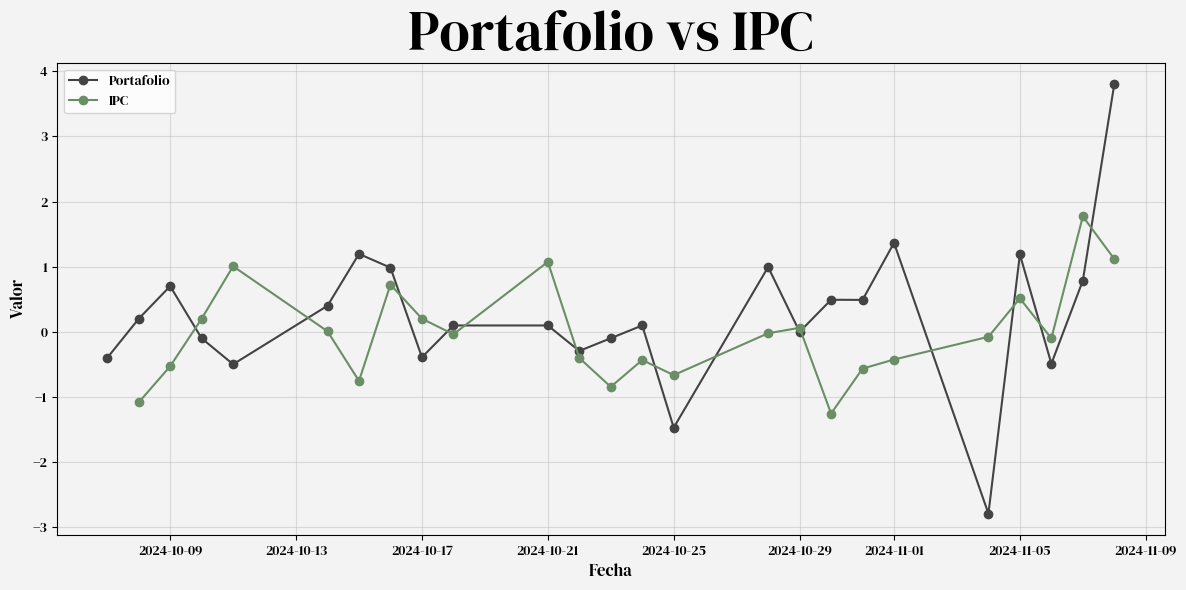

Correlation between Portfolio and S&P 500: 0.24725056661391462


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the portfolio values and dates
values = [1000, 996, 998, 1005, 1004, 999, 1003, 1015, 1025, 1021, 1022, 1023, 1020, 1019, 1020, 1005, 1015, 1015, 1020, 1025, 1039, 1010, 1022, 1017, 1025, 1064]
dates = pd.date_range(start='2024-10-04', end='2024-11-08', freq='B')

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(data={'Value': values}, index=dates)

# Calculate the percentage rate change for the portfolio
portfolio_df['Pct Change'] = portfolio_df['Value'].pct_change() * 100

# Fetch S&P 500 data
sp500 = yf.Ticker("^MXX")
sp500_data = sp500.history(start=dates.min(), end=dates.max())

# Convert the index of sp500_data to the same time zone as portfolio_df
sp500_data.index = sp500_data.index.tz_convert(None)

# Calculate the percentage rate change for the S&P 500
sp500_data['Pct Change'] = sp500_data['Close'].pct_change() * 100

# Align the dates of the S&P 500 data with the portfolio data
aligned_sp500_data = sp500_data.reindex(portfolio_df.index, method='ffill')

# Plot the values with custom color
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#f3f3f3')
ax.set_facecolor('#f3f3f3')
plt.plot(portfolio_df.index, portfolio_df['Pct Change'], marker='o', label='Portafolio', color='#434343')
plt.plot(aligned_sp500_data.index, aligned_sp500_data['Pct Change'], marker='o', label='IPC', color='#6A8E66')
plt.title('Portafolio vs IPC', fontsize=40, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.4)
plt.tight_layout()

# Show the plot
plt.show()

correlation = portfolio_df['Pct Change'].corr(aligned_sp500_data['Pct Change'])
print(f"Correlation between Portfolio and S&P 500: {correlation}")
